# Magic 8 Ball App

In [ ]:
%%writefile eight_ball.py
"""Ask a question of the magic eight ball."""
import random

CHOICES = ['It is decidedly so',
           'Yes definitely',
           'Reply hazy try again',
           'Ask again later',
           'Concentrate and ask again',
           'My reply is no',
           'Outlook not so good',
           'Very doubtful']

def main():
  """Get input and print random response."""
  input("Ask a yes or no question to the magic eight ball\n")
  print(random.choice(CHOICES))


if __name__ == '__main__':
  main()


Overwriting eight_ball.py


In [ ]:
!python eight_ball.py

Ask a yes or no question to the magic eight ball
Will Colab update their Python version this year?
Yes definitely


# Conway's Game of Life

In [ ]:
import copy
import random

In [ ]:
def step(grid, width, height):
  new_grid = copy.copy(grid)
  for i in range(1, height - 1):
    for j in range(1, width - 1):
      neighbor_count = (sum(grid[i-1][j-1:j+2]) + sum(grid[i+1][j-1:j+2]) +
                        grid[i][j-1] + grid[i][j+1])
      if grid[i][j]:
        if neighbor_count == 2 or neighbor_count == 3:
          new_grid[i][j] = True
        else:
          new_grid[i][j] = False
      elif neighbor_count == 3:
        new_grid[i][j] = True
      else:
        new_grid[i][j] = False
  return new_grid
  

In [ ]:
def print_grid(grid):
  print('-' * len(grid[0]))
  for row in grid[1:-1]:
    print(''.join('#' if cell else ' ' for cell in row[1:-1]))

In [ ]:
def randomize_grid(grid, width, height):
  for i in range(1, height - 1):
    for j in range(1, width - 1):
      grid[i][j] = random.choice([True, False])

In [ ]:
def game(width, height):
  width += 2
  height += 2
  grid = [[False for _ in range(width)] for _ in range(height)]
  randomize_grid(grid, width, height)
  for i in range(10000):
    grid = step(grid, width, height)
    print_grid(grid)


In [ ]:
game(60, 20)

Streaming output truncated to the last 5000 lines.
#      ###   ## # #   ## #  # ##  ##   #   ##      # ##### #
 ####   ##       ########  ## ##                      # # ##
--------------------------------------------------------------
     ###       #      ##    ##   #### ##        ######      
       #      ## ##    ##    #  #   #    # # ##      ##     
 #   ###     #    ##  #    # #  #  ####### # # #####        
##  #         # # # # # ## # # ## #          #      ##      
#  ## ##       #### # # ## # #    ########### # ## #  #     
#   #   #         # # # ##### ####  #    #  # #  # # ###    
##  ######     #### # #       #   ### ##    # # ## #    #   
          ### # #   # #      #  ##      ##### #    ### # #  
    ####### ###   # # #     # ##       #      #   #      ## 
   #  # #    # #### # #    ###  #     # ##   ### # ##### # #
    ### ### ## #    #  #  #   ##  ###      ### # # #       #
  # #      #   ####  # ## # ##  ### #  ##### # # # #######  
 ## # #       #   ## # # # #  ##

# Conways Game Animated

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import numpy as np
from scipy.signal import correlate2d

plt.style.use('seaborn')

neighbor_matrix = np.array([[1,1,1],
                            [1,0,1],
                            [1,1,1]])

class GameOfLife:
  """Animated implementation of Conway's Game of Life."""
  
  def __init__(self, width, height, boundary='fill'):
    self.grid = np.random.randint(0, 2, size=(height, width))
    self.boundary = boundary
    self.fig, ax = plt.subplots(figsize=(width//5, height//5))
    ax.grid(b=True)
    ax.set_yticks([])
    ax.set_xticks([])
    self.image = ax.imshow(self.grid)
    plt.close()

  def init(self):
    self.image.set_data(self.grid)
    return self.image,

  def animate(self, i):
    self.step()
    self.image.set_data(self.grid)
    return self.image,
  
  def step(self):
    corr = correlate2d(self.grid, neighbor_matrix, mode='same', boundary=self.boundary)
    self.grid = ((self.grid & (corr > 1) & (corr < 4)) |
                 ((-self.grid + 1) & (corr == 3)))

  
  def draw(self):
    anim = animation.FuncAnimation(self.fig, self.animate, init_func=self.init,
                                   frames=500, interval=25, blit=True)
    rc('animation', html='jshtml')
    return anim



In [ ]:
game = GameOfLife(60, 20, boundary='wrap')

In [ ]:
game.draw()

In [ ]:
game = GameOfLife(60, 20, boundary='fill')

In [ ]:
game.draw()

# Projects

## Comma code

In [ ]:
def commas(lst):
  """Print list with commas and 'and'."""
  if len(lst) > 1:
    lst[-2] = ' and '.join(lst[-2:])
    return ', '.join(lst[:-1])
  return ''.join(lst)

In [ ]:
commas([])

''

In [ ]:
commas(['banana'])

'banana'

In [ ]:
commas(['apple', 'banana'])

'apple and banana'

In [ ]:
commas(['apple', 'orange', 'banana'])

'apple, orange and banana'

# Coin Flip Streaks

In [ ]:
from itertools import groupby
from random import randint

def streak_count(n, streak_length):
  """
  Returns number of times n coin flips had at least the given streak length.
  """
  streaks = len([1 for _, streak in groupby(randint(0, 1) for _ in range(n))
                 if len(list(streak)) >= streak_length])
  return streaks

In [ ]:
streak_count(10_000, 6)

0

In [ ]:
def streak_percent(n, k, streak_length):
  """
  Returns percent of k length coin flips which had streaks of streak_length
  """
  return sum(any(len(list(streak)) >= streak_length
                 for _, streak in groupby(randint(0, 1) for _ in range(k)))
                 for _ in range(n)) / n

In [ ]:
result = [streak_percent(10_000, i, 6) for i in range(100)]

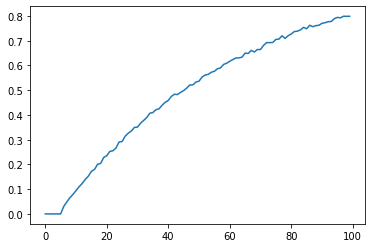

In [ ]:
import matplotlib.pyplot as plt

plt.plot(result)

In [ ]:
streak_percent(10_000, 100, 6)

0.8118

### Comparing two methods to calculate this

In [ ]:
import numpy as np
from numpy.linalg import matrix_power

a = np.array([[0.5,0.5,0,0,0,0],
             [0.5,0,0.5,0,0,0],
             [0.5,0,0,0.5,0,0],
             [0.5,0,0,0,0.5,0],
             [0.5,0,0,0,0,0.5],
             [0.0,0,0,0,0,1.0],
             ])

In [ ]:
matrix_power(a, 50)[0,5]

0.5518753229536166

In [ ]:
result_matrix = [matrix_power(a, i)[0, 5] for i in range(100)]

In [ ]:
result_other = [1-(1-.5**6)**(i + 1-6) for i in range(100)]

In [ ]:
result2 = [0,0,0,0,0] + [1 - (1 - .5**6)**(i) for i in range(100)]

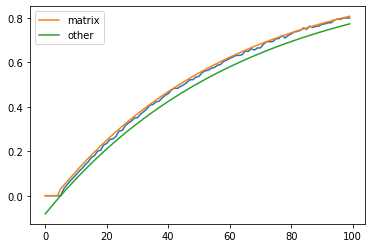

In [ ]:
plt.plot(result)
plt.plot(result_matrix, label='matrix')
plt.plot(result_other, label='other')
plt.legend()

Matrix method looks much more accurate

In [ ]:
def calculate_streak_probability(n):
  """Returns probability of getting 6 consecutive coin flips in n flips."""
  a = np.array([[0.5,0.5,0,0,0,0],
                [0.5,0,0.5,0,0,0],
                [0.5,0,0,0.5,0,0],
                [0.5,0,0,0,0.5,0],
                [0.5,0,0,0,0,0.5],
                [0.0,0,0,0,0,1.0],
                ])
  return matrix_power(a, n)[0,5]

In [ ]:
calculate_streak_probability(100)

0.8101095991963579

## Character Picture Grid

In [ ]:
grid = [['.', '.', '.', '.', '.', '.'],
        ['.', 'O', 'O', '.', '.', '.'],
        ['O', 'O', 'O', 'O', '.', '.'],
        ['O', 'O', 'O', 'O', 'O', '.'],
        ['.', 'O', 'O', 'O', 'O', 'O'],
        ['O', 'O', 'O', 'O', 'O', '.'],
        ['O', 'O', 'O', 'O', '.', '.'],
        ['.', 'O', 'O', '.', '.', '.'],
        ['.', '.', '.', '.', '.', '.']]

In [ ]:
print('\n'.join(''.join(row) for row in grid))

......
.OO...
OOOO..
OOOOO.
.OOOOO
OOOOO.
OOOO..
.OO...
......
